In [55]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
# Not required if loading pre-built keras dataset
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

In [28]:
# Scale pixel values to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [31]:
X_train.shape

(60000, 784)

In [32]:
# Creating Autoencoder Model
input_layer = Input(shape=(28*28,))
encoder_layer = Dense(512, activation="leaky_relu")(input_layer)
decoder_layer = Dense(28*28, activation="sigmoid")(encoder_layer)

autoencoder_model = Model(input_layer, decoder_layer)

In [47]:
model = Sequential()
model.add(Dense(512, input_shape=(28*28,), activation="leaky_relu"))
#model.add(Dense(32, activation="elu"))
model.add(Dense(28*28, activation="sigmoid"))


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
early_stopping_callback = EarlyStopping(patience=10)


In [49]:
history = model.fit(
    X_train,
    X_train,
    batch_size=32,
    epochs=1,
    callbacks=[early_stopping_callback],
    validation_data = (X_test, X_test)
)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.2482 - accuracy: 0.2814 - val_loss: 0.2506 - val_accuracy: 0.2747


In [51]:
X_test[0].shape

(784,)

In [53]:

y_pred = model.predict(np.expand_dims(X_test[0], 0))

1/1 [==============================] - 0s 60ms/step


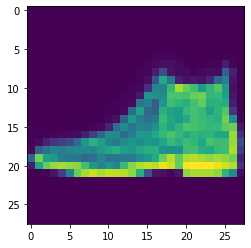

In [58]:
plt.imshow(y_pred.reshape(28, 28))
plt.show()

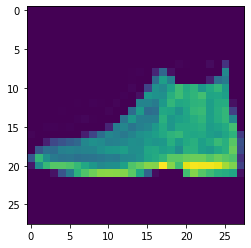

In [59]:
plt.imshow(X_test[0].reshape(28,28))

In [21]:
autoencoder_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
early_stopping_callback = EarlyStopping(patience=10)

In [22]:
history = autoencoder_model.fit(
    X_train,
    X_train,
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping_callback],
    validation_data = (X_test, X_test)
)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2545 - accuracy: 0.1316 - val_loss: 0.2561 - val_accuracy: 0.1519
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2524 - accuracy: 0.1673 - val_loss: 0.2540 - val_accuracy: 0.1778
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2513 - accuracy: 0.1956 - val_loss: 0.2529 - val_accuracy: 0.2134
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2505 - accuracy: 0.2156 - val_loss: 0.2524 - val_accuracy: 0.2300
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2499 - accuracy: 0.2314 - val_loss: 0.2523 - val_accuracy: 0.2240
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2495 - accuracy: 0.2423 - val_loss: 0.2530 - val_accuracy: 0.2374
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2492 - accuracy: 0.2546 - val_loss: 0.2516 - val_ac

In [ ]:
model.predict

In [102]:
# Creating speparate encoder model
encoder_model = Model(input_layer, encoder_layer)

# Creating separate decoder model
decoder_input = Input(shape=(32,))
decoder_layer2 = Dense(28*28, activation="sigmoid")(decoder_input)
decoder_model = Model(decoder_input, decoder_layer2)